# LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn import preprocessing
from plotly import express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

# DATASET

In [ ]:
data = pd.read_csv('./data/chotot.csv')

In [ ]:
data.head()

Unnamed: 0                                            subject  size  \
0           0     Bán nhà Huỳnh Tấn Phát 44m2 2 tầng giá 3 tỷ 75  44.0   
1           1              Mặt Tiền Hoa Sữa. P7. khu QH miếu nổi  65.0   
2           2          NHÀ HẼM ĐỔ XUÂN HỢP. PHƯỚC LONG B. QUẬN 9  44.8   
3           3  Chính chủ cần bán nhà thạnh lộc 44 q12,hẻm xe tải  26.0   
4           4     Nhà Đẹp Ở Ngay-Nguyễn Trọng Tuyển-P2-Tân Bình.  22.0   

    width  length  room  area    ward  toilet  living size  floor  house type  \
0     3.5    12.0   2.0   102  9466.0     2.0          NaN    1.0         3.0   
1     3.8    17.0   6.0   111  9328.0     6.0        238.0    NaN         1.0   
2     3.2    14.0   2.0   104  9256.0     2.0         44.8    1.0         3.0   
3    35.0     8.0   2.0   107  9228.0     2.0         52.0    1.0         3.0   
4  3500.0  6500.0   2.0   112  9311.0     NaN         55.0    NaN         3.0   

   zero deposit  direction                street  escrow can deposit  \
0         False        NaN  Đường Huỳnh Tấn Phát                   2   
1         False        NaN         Đường Hoa Sữa                   2   
2         False        NaN     Đường Đỗ Xuân Hợp                   2   
3         False        8.0     Đường Hà Huy Giáp                   2   
4         False        1.0    Nguyễn Trọng Tuyển                   2   

   property legal document  protection entitlement  furnishing sell  \
0                      1.0                   False              1.0   
1                      1.0                   False              1.0   
2                      1.0                   False              3.0   
3                      3.0                   False              3.0   
4                      1.0                   False              NaN   

         price  
0   3750000000  
1  18500000000  
2    890000000  
3   1300000000  
4   3550000000

In [ ]:
data = data.infer_objects()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95400 entries, 0 to 95399
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               95400 non-null  int64  
 1   subject                  95400 non-null  object 
 2   size                     95396 non-null  float64
 3   width                    80154 non-null  float64
 4   length                   79228 non-null  float64
 5   room                     95396 non-null  float64
 6   area                     95400 non-null  int64  
 7   ward                     95068 non-null  float64
 8   toilet                   73393 non-null  float64
 9   living size              62158 non-null  float64
 10  floor                    60428 non-null  float64
 11  house type               95349 non-null  float64
 12  zero deposit             95400 non-null  bool   
 13  direction                28474 non-null  float64
 14  street                

In [ ]:
data.isnull().sum()

Unnamed: 0                     0
subject                        0
size                           4
width                      15246
length                     16172
room                           4
area                           0
ward                         332
toilet                     22007
living size                33242
floor                      34972
house type                    51
zero deposit                   0
direction                  66926
street                     33243
escrow can deposit             0
property legal document    21163
protection entitlement         0
furnishing sell            50326
price                          0
dtype: int64

# DATA PREPROCESSING

In [ ]:
data[data.columns[data.isnull().any()]].isnull().sum() * 100 / data.shape[0]

size                        0.004193
width                      15.981132
length                     16.951782
room                        0.004193
ward                        0.348008
toilet                     23.068134
living size                34.844864
floor                      36.658281
house type                  0.053459
direction                  70.153040
street                     34.845912
property legal document    22.183438
furnishing sell            52.752621
dtype: float64

Loại bỏ các attribute nào có giá trị Nan trên 50% tổng số dữ liệu

In [ ]:
del data['furnishing sell']
del data['direction']

## Nan

In [ ]:
data.columns = ['index', *data.columns[1:]]
data['street'] = data['street'].fillna('')
imputer = KNNImputer(n_neighbors = 5)
imputer.fit(data.select_dtypes('float64'))
cols_float = list(data.select_dtypes('float64').columns)
data[cols_float] = imputer.transform(data.select_dtypes('float64'))

In [ ]:
data.head()

index                                            subject  size   width  \
0      0     Bán nhà Huỳnh Tấn Phát 44m2 2 tầng giá 3 tỷ 75  44.0     3.5   
1      1              Mặt Tiền Hoa Sữa. P7. khu QH miếu nổi  65.0     3.8   
2      2          NHÀ HẼM ĐỔ XUÂN HỢP. PHƯỚC LONG B. QUẬN 9  44.8     3.2   
3      3  Chính chủ cần bán nhà thạnh lộc 44 q12,hẻm xe tải  26.0    35.0   
4      4     Nhà Đẹp Ở Ngay-Nguyễn Trọng Tuyển-P2-Tân Bình.  22.0  3500.0   

   length  room  area    ward  toilet  living size  floor  house type  \
0    12.0   2.0   102  9466.0     2.0        78.04    1.0         3.0   
1    17.0   6.0   111  9328.0     6.0       238.00    3.6         1.0   
2    14.0   2.0   104  9256.0     2.0        44.80    1.0         3.0   
3     8.0   2.0   107  9228.0     2.0        52.00    1.0         3.0   
4  6500.0   2.0   112  9311.0     2.2        55.00    3.2         3.0   

   zero deposit                street  escrow can deposit  \
0         False  Đường Huỳnh Tấn Phát                   2   
1         False         Đường Hoa Sữa                   2   
2         False     Đường Đỗ Xuân Hợp                   2   
3         False     Đường Hà Huy Giáp                   2   
4         False    Nguyễn Trọng Tuyển                   2   

   property legal document  protection entitlement        price  
0                      1.0                   False   3750000000  
1                      1.0                   False  18500000000  
2                      1.0                   False    890000000  
3                      3.0                   False   1300000000  
4                      1.0                   False   3550000000

In [ ]:
data.isnull().sum()

index                      0
subject                    0
size                       0
width                      0
length                     0
room                       0
area                       0
ward                       0
toilet                     0
living size                0
floor                      0
house type                 0
zero deposit               0
street                     0
escrow can deposit         0
property legal document    0
protection entitlement     0
price                      0
dtype: int64

In [ ]:
data = data.infer_objects()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95400 entries, 0 to 95399
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    95400 non-null  int64  
 1   subject                  95400 non-null  object 
 2   size                     95400 non-null  float64
 3   width                    95400 non-null  float64
 4   length                   95400 non-null  float64
 5   room                     95400 non-null  float64
 6   area                     95400 non-null  int64  
 7   ward                     95400 non-null  float64
 8   toilet                   95400 non-null  float64
 9   living size              95400 non-null  float64
 10  floor                    95400 non-null  float64
 11  house type               95400 non-null  float64
 12  zero deposit             95400 non-null  bool   
 13  street                   95400 non-null  object 
 14  escrow can deposit    

In [ ]:
data['property legal document'] = data['property legal document'].astype(int)
data.head()

index                                            subject  size   width  \
0      0     Bán nhà Huỳnh Tấn Phát 44m2 2 tầng giá 3 tỷ 75  44.0     3.5   
1      1              Mặt Tiền Hoa Sữa. P7. khu QH miếu nổi  65.0     3.8   
2      2          NHÀ HẼM ĐỔ XUÂN HỢP. PHƯỚC LONG B. QUẬN 9  44.8     3.2   
3      3  Chính chủ cần bán nhà thạnh lộc 44 q12,hẻm xe tải  26.0    35.0   
4      4     Nhà Đẹp Ở Ngay-Nguyễn Trọng Tuyển-P2-Tân Bình.  22.0  3500.0   

   length  room  area    ward  toilet  living size  floor  house type  \
0    12.0   2.0   102  9466.0     2.0        78.04    1.0         3.0   
1    17.0   6.0   111  9328.0     6.0       238.00    3.6         1.0   
2    14.0   2.0   104  9256.0     2.0        44.80    1.0         3.0   
3     8.0   2.0   107  9228.0     2.0        52.00    1.0         3.0   
4  6500.0   2.0   112  9311.0     2.2        55.00    3.2         3.0   

   zero deposit                street  escrow can deposit  \
0         False  Đường Huỳnh Tấn Phát                   2   
1         False         Đường Hoa Sữa                   2   
2         False     Đường Đỗ Xuân Hợp                   2   
3         False     Đường Hà Huy Giáp                   2   
4         False    Nguyễn Trọng Tuyển                   2   

   property legal document  protection entitlement        price  
0                        1                   False   3750000000  
1                        1                   False  18500000000  
2                        1                   False    890000000  
3                        3                   False   1300000000  
4                        1                   False   3550000000

## Histogram

### Property legal document

In [ ]:
fig = go.Figure(px.histogram(data, x = 'property legal document', title = 'Histogram of property legal document'))
fig.update_layout(title_x=0.5)
fig.show()

### Protection entitlement

In [ ]:
fig = go.Figure(px.histogram(data, x = 'protection entitlement', title = 'Histogram of protection entitlement'))
fig.update_layout(title_x=0.5)
fig.show()

### Escrow can deposit

In [ ]:
fig = go.Figure(px.histogram(data, x = 'escrow can deposit', title = 'Histogram of escrow can deposit'))
fig.update_layout(title_x=0.5)
fig.show()

Mật độ phân bố của thuộc tính **Escrow can deposit** chỉ phân bố trong một nơi nên thuộc tính này sẽ không ảnh hưởng đến biến phụ thuộc **Price** mà ta cần dự đoán

### Zero deposit

In [ ]:
fig = go.Figure(px.histogram(data, x = 'zero deposit', title = 'Histogram of zero deposit'))
fig.update_layout(title_x=0.5)
fig.show()

Mật độ phân bố của thuộc tính **Zero deposit** chỉ phân bố trong một nơi nên thuộc tính này sẽ không ảnh hưởng đến biến phụ thuộc **Price** mà ta cần dự đoán

### Land area

In [ ]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=("Histogram of width", "Histogram of length"))
fig.append_trace(go.Histogram(x = 1/(np.log(data['width'])), nbinsx=40), row = 1, col = 1)
fig.append_trace(go.Histogram(x = 1/(np.log(data['length'])), nbinsx=40), row = 1, col = 2)

fig.update_layout(height=600, width= np.inf, title_text="Distribution of land area", showlegend=False, title_x = 0.5)
fig.show()

Histogram về mật độ phân bố **Width** vs **Lenght** đều bị ảnh hưởng bởi một vài dữ liệu sai số quá cao so với sự phân bố của các dữ liệu còn lại.

## Heatmap of correlation matrix
Ma trận tương quan là một bảng thể hiện các hệ số tương quan giữa các tập hợp các biến. Ma trận tương quan hiển thị hệ số tương quan cho sự kết hợp của tập hợp các biến. Đường chéo của bảng luôn là một tập hợp các tương quan chính nó, nên mối tương quan giữa một biến và chính nó luôn là 1.

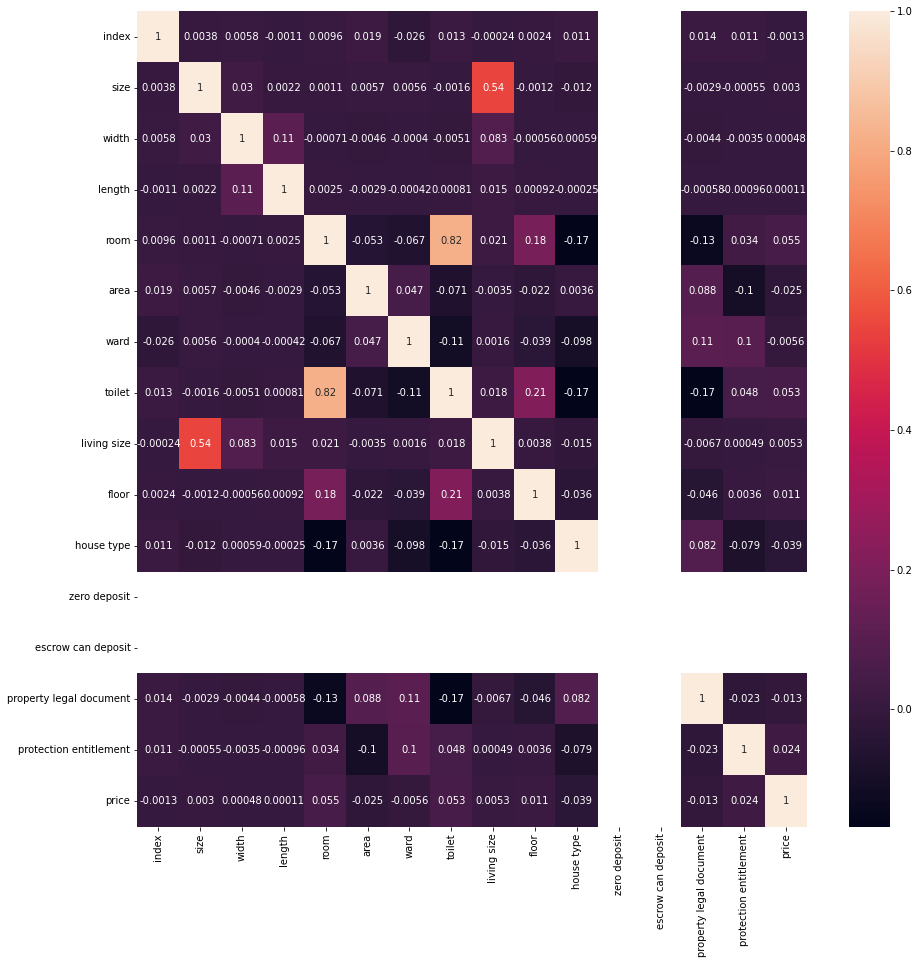

In [ ]:
cormap = data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cormap, annot = True)

Từ bản đồ nhiệt của ma trận tương quan ở trên, có thể hiểu rằng nhiều thuộc tính đang thể hiện mối tương quan tuyến tính với nhau. Vì vậy, ta có thẻ loại bỏ các sự dư thừa thuộc tính trong tập dữ liệu.

Thông qua ma trận tương quan, có thể thấy được 2 thuộc tính **Zero deposit** vs **Escrow can deposit** không có tương quan tuyến tính với các thuộc tính còn lại trong tập dữ liệu. Vì vậy cần loại bỏ 2 thuộc tính dư thừa ra khỏi tập dữ liệu.

In [ ]:
del data['index']
del data['property legal document']
del data['protection entitlement']
del data['zero deposit']
del data['escrow can deposit']

## Boxplot

In [ ]:
sns.set_theme(style="whitegrid")

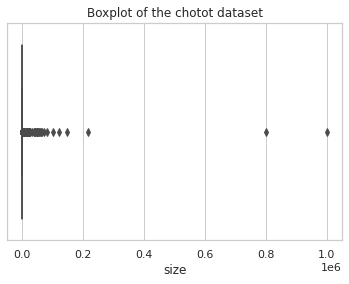

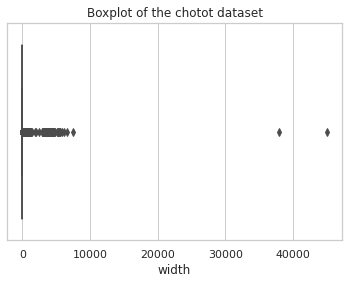

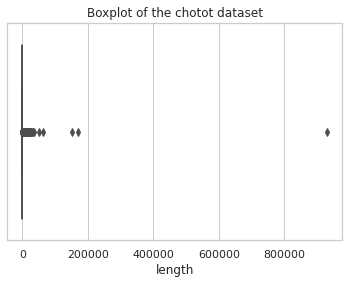

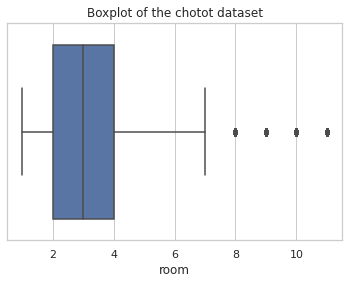

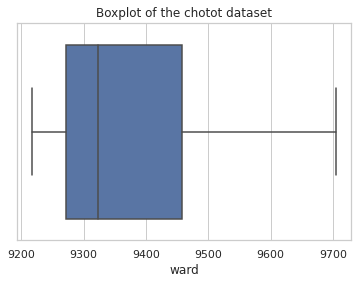

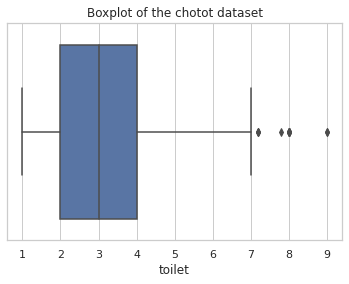

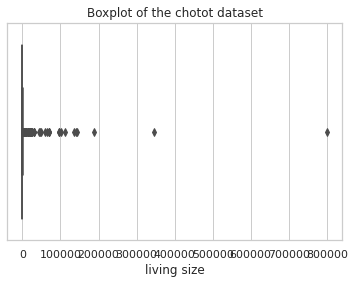

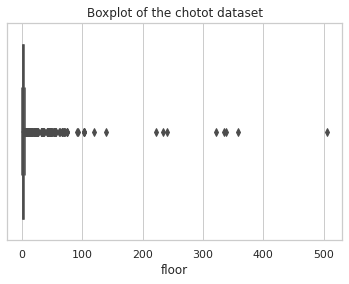

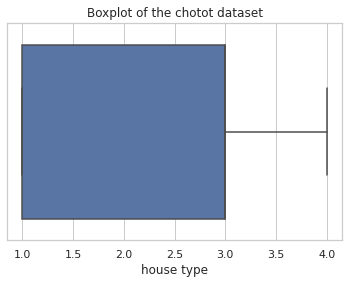

In [ ]:
for i in data.columns[1:11]:
    sns.boxplot(x=data[i])
    plt.title('Boxplot of the chotot dataset')
    plt.show()

In [ ]:
# loại bỏ các giá trị ngoại lai bằng phương pháp phạm vi liên phân vị (IQR)

Q1 = data.quantile(0.25) # 25% dữ liệu đầu tiên
Q3 = data.quantile(0.75) # 75% dữ liệu đầu tiên
IQR = Q3 - Q1 # IQR = InterQuartile Range

scale = 2 # Đối với phân phối thông thường, tỷ lệ = 1,5
lower_lim = Q1 - scale*IQR
upper_lim = Q3 + scale*IQR

lower_outliers = (data[data.columns[1:11]] < lower_lim)
upper_outliers = (data[data.columns[1:11]] > upper_lim)

In [ ]:
# kiểm tra các giá trị ngoại lệ kết quả được tính bằng phương pháp trên (được trình bày dưới dạng các giá trị không rỗng)

data[data.columns[1:11]][(lower_outliers | upper_outliers)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95400 entries, 0 to 95399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   size         6043 non-null   float64
 1   width        10294 non-null  float64
 2   length       2607 non-null   float64
 3   room         3157 non-null   float64
 4   area         1 non-null      float64
 5   ward         0 non-null      float64
 6   toilet       2 non-null      float64
 7   living size  3184 non-null   float64
 8   floor        1631 non-null   float64
 9   house type   0 non-null      float64
dtypes: float64(10)
memory usage: 7.3 MB


In [ ]:
# tạo DataFrame mới mà không có các ngoại lệ

num_cols = list(data.columns[2:13])
data_out_IQR = data[~((data[num_cols] < (Q1 - 2 * IQR)) |(data[num_cols] > (Q3 + 2 * IQR))).any(axis=1)]

In [ ]:
data_out_IQR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79187 entries, 0 to 95399
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subject      79187 non-null  object 
 1   size         79187 non-null  float64
 2   width        79187 non-null  float64
 3   length       79187 non-null  float64
 4   room         79187 non-null  float64
 5   area         79187 non-null  int64  
 6   ward         79187 non-null  float64
 7   toilet       79187 non-null  float64
 8   living size  79187 non-null  float64
 9   floor        79187 non-null  float64
 10  house type   79187 non-null  float64
 11  street       79187 non-null  object 
 12  price        79187 non-null  int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 8.5+ MB


In [ ]:
data_out_IQR.to_csv('data_out_IQR.csv', index=False, encoding="utf-8-sig")

In [ ]:
temp_data = data_out_IQR.copy()

In [ ]:
temp_data = temp_data.set_index(pd.Index([i for i in range(len(temp_data))]))

In [ ]:
temp_data.sort_values(by='width')

subject   size  width  \
61283      Bán Nhà Mặt Tiền đường số 3 lầu 3Pn 3Wc P4 Q4   17.0    2.0   
47412      Nha1trêt2lâu24mđùöngphanđăng lùu.p3.phú nhuãn    8.0    2.0   
36290                        Nhà mặt tiền Mạc Vân.P13.Q8    8.0    2.0   
34977    Nhà hẻm 160 Phan Huy Ích 60m2 3Pn xe hơi đỗ cửa   60.0    2.0   
22496                  Bán nhà nhỏ ,mềm xèo ,shr quận 11   15.0    2.0   
...                                                  ...    ...    ...   
66198  Nhà Đúc 1 tấm TCH18 Q12 tặng nội thất hẻm 6m t...   60.0    7.0   
9334     Bán nhà mới 100%,Sổ hồng công chứng nhà nước...   21.0    7.0   
9385       DIỆN TÍCH KHỦNG 222M2- GIÁ CHỈ NHỈNH 32TR/M2.  222.0    7.0   
66459            Bán dãy trọ 110m2 TL28, Q.12 chỉ 3,6 tỷ  110.0    7.0   
61037   bán nhà Mặt tiền Bà điểm 11 ngay bến xe An Sương  224.0    7.0   

       length  room  area    ward  toilet  living size  floor  house type  \
61283     7.0   3.0    99  9400.0     2.6         17.0    3.0         1.0   
47412     4.0   2.0   111  9329.0     2.0         24.0    2.4         4.0   
36290     5.0   1.0   103  9448.0     1.0         16.0    1.6         1.0   
34977    15.0   3.0   110  9268.0     3.0        120.0    2.0         3.0   
22496     6.2   1.0   106  9384.0     1.0         30.0    2.0         3.0   
...       ...   ...   ...     ...     ...          ...    ...         ...   
66198     9.0   2.0   107  9231.0     2.0         94.0    1.0         3.0   
9334      3.0   2.0   102  9466.0     2.0         42.0    1.6         3.0   
9385     32.0   2.0   117  9503.0     2.0        205.0    1.0         1.0   
66459    15.0   5.0   107  9228.0     5.0        110.0    1.0         3.0   
61037    30.0   5.0   117  9508.0     6.0        224.0    1.0         1.0   

                   street       price  
61283                      3500000000  
47412                      1150000000  
36290       Đường Mạc Vân  1300000000  
34977  Đường Phan Huy Ích  5600000000  
22496       Lạc Long Quân  1680000000  
...                   ...         ...  
66198                      3860000000  
9334                       1400000000  
9385       Nguyễn Văn Bứa  4600000000  
66459                      3600000000  
61037                      8700000000  

[79187 rows x 13 columns]

## Street data processing

In [ ]:
temp_data = pd.read_csv('data_out_IQR.csv')
temp_data.sort_values(by='width')

subject   size  width  \
6775                           Bán nhà nhỏ quận thủ đức.   14.0    2.0   
47742   50Triệu/m2 Giáp Ranh Q. Tân Phú 2Tầng 2PN Hẻm 6m   95.0    2.0   
56495      Nhà đẹp ngay ngã 3 Thống Nhất và Phan Văn Trị   14.0    2.0   
78100  Nhà hẻm xe hơi Nhỏ Xinh 2L 154 Âu Dương Lân.P3.Q8   17.0    2.0   
34977    Nhà hẻm 160 Phan Huy Ích 60m2 3Pn xe hơi đỗ cửa   60.0    2.0   
...                                                  ...    ...    ...   
66198  Nhà Đúc 1 tấm TCH18 Q12 tặng nội thất hẻm 6m t...   60.0    7.0   
9334     Bán nhà mới 100%,Sổ hồng công chứng nhà nước...   21.0    7.0   
9385       DIỆN TÍCH KHỦNG 222M2- GIÁ CHỈ NHỈNH 32TR/M2.  222.0    7.0   
66459            Bán dãy trọ 110m2 TL28, Q.12 chỉ 3,6 tỷ  110.0    7.0   
61037   bán nhà Mặt tiền Bà điểm 11 ngay bến xe An Sương  224.0    7.0   

       length  room  area    ward  toilet  living size  floor  house type  \
6775      6.0   1.0   114  9244.0     1.0         30.0    1.0         3.0   
47742    22.7   2.0   108  9456.0     2.0        180.0    2.0         3.0   
56495     7.0   2.0   110  9277.0     1.0         14.0    1.0         3.0   
78100     8.0   2.0   103  9442.0     3.0         36.0    2.0         3.0   
34977    15.0   3.0   110  9268.0     3.0        120.0    2.0         3.0   
...       ...   ...   ...     ...     ...          ...    ...         ...   
66198     9.0   2.0   107  9231.0     2.0         94.0    1.0         3.0   
9334      3.0   2.0   102  9466.0     2.0         42.0    1.6         3.0   
9385     32.0   2.0   117  9503.0     2.0        205.0    1.0         1.0   
66459    15.0   5.0   107  9228.0     5.0        110.0    1.0         3.0   
61037    30.0   5.0   117  9508.0     6.0        224.0    1.0         1.0   

                   street       price  
6775                   16   890000000  
47742          Đường Số 3  5660000000  
56495                Số 8  1300000000  
78100                 NaN  2600000000  
34977  Đường Phan Huy Ích  5600000000  
...                   ...         ...  
66198                 NaN  3860000000  
9334                  NaN  1400000000  
9385       Nguyễn Văn Bứa  4600000000  
66459                 NaN  3600000000  
61037                 NaN  8700000000  

[79187 rows x 13 columns]

In [ ]:
temp_data['street'] = temp_data['street'].fillna('')
print(temp_data['street'].values)

['Đường Huỳnh Tấn Phát' 'Đường Hoa Sữa' 'Đường Đỗ Xuân Hợp' ... '' '' '']


In [ ]:
streets_data = [street.lower().strip() for street in temp_data['street'].values]
print("Số lượng tên đường null:" , streets_data.count(""))

Số lượng tên đường null: 27272


Lấy danh sách những tên đường chỉ xuất hiện 1 lần để lọc những tên đường nhập lỗi

In [ ]:
titles_data = temp_data['subject'].values

In [ ]:
streets_count = [[streets_data[i],i] for i in range(len(streets_data)) if streets_data.count(streets_data[i]) == 1]

In [ ]:
print(len(streets_count))

4470


In [ ]:
ord_streets_remove = [i[1] for i in streets_count]
#print(ord_streets_remove)

In [ ]:
for idx in ord_streets_remove: 
    streets_data[idx] = ""

Loại bỏ các tên đường có chữ "hem" hoặc "hẻm"

In [ ]:
for idx in range(len(streets_data)):
    if "hem" in streets_data[idx] or "hẻm" in streets_data[idx]:
        streets_data[idx] = ""

Lấy danh sách tên đường lưu vào biến streets_ok

In [ ]:
temp_streets = streets_data.copy()
streets_ok = []
for i in range(len(streets_data)):
    if len(streets_data[i]) > 1:
        street_name = streets_data[i]
        if "." in street_name:
            street_name = street_name.replace(".","").strip()
        if "," in street_name:
            street_name = street_name.replace(",","").strip()
        if ":" in street_name:
            street_name = street_name.replace(":","").strip()
        if "?" in street_name:
            street_name = street_name.replace("?","").strip()
        if "//" in street_name:
            street_name = street_name.replace("//","").strip()
        if "\\" in street_name:
            street_name = street_name.replace("\\","").strip()
        if "|" in street_name:
            street_name = street_name.replace("|"," ").strip()
        if "  " in street_name:
            street_name = street_name.replace("  "," ").strip()
        if street_name[0:5] == "đường":
            temp_streets[i] = street_name[5:].strip()
            streets_ok.append(street_name[5:].strip())
        else:
            streets_ok.append(street_name)

Dựa vào thống kê tên đường, lọc ra tên đường không đúng

In [ ]:
streets = list(set(streets_ok))
streets = streets[1:]
print(len(streets))

2036


In [ ]:
streets.sort(reverse=True,key=lambda x:len(x))
#print(streets)

Xóa các tên đường lỗi và các tên đường là tên quận, huyện tại TPHCM

In [ ]:
districts = ["quận " + str(i+1) for i in range(12)]
districts.extend(["bình tân","bình thạnh","gò vấp","phú nhuận","tân bình","tân phú","thủ đức","bình chánh","cần giờ","củ chi","hóc môn","nhà bè"])
streets_remove = ["số","mặt tiền đường số","huỳnh tấn","nguyễn","hiệp bình","-- đường / phố --","xe tải","hẻm xe hơi","trung tâm","gần aeon","hẻm 3","hẻm 4","chùa","bùi","quận","nhựa","trục","bình","nnnn","dinh","phan","hem 15","hẻm 5m","liên hệ","khu phố 1"]
removes = streets_remove + districts
for i in removes:
    if i in streets:
        streets.remove(i)
print(len(streets))

2026


In [ ]:
temp_streets_data = temp_streets.copy()
for idx in range(len(temp_streets_data)):
    if (temp_streets_data[idx] in streets_remove):
        streets_data[idx] = ""
        temp_streets[idx] = ""

Cập nhật lại danh sách tên đường dựa vào title

In [ ]:
for idx in range(len(titles_data)):
    if (streets_data[idx] == "") or (len(streets_data[idx]) <= 3) or (len(streets_data[idx]) > 13):
        for street in streets:
            if len(street) > 1:
                if len(street) > 5:
                    if street in titles_data[idx].lower().strip():
                        temp_streets[idx] = street
                        break
                else:
                    if "đường " + street in titles_data[idx].lower().strip():
                        temp_streets[idx] = street
                        break

In [ ]:
print("Số lượng tên đường null:" , temp_streets.count(""))
#print(temp_streets)

Số lượng tên đường null: 14016


Cập nhật lại tên đường mới dựa vào tên đường cũ nếu tên đường cũ quá dài hoặc quá ngắn

In [ ]:
streets.sort(reverse=False,key=lambda x:len(x))
#print(streets)

In [ ]:
final_streets = temp_streets.copy()

In [ ]:
count = 0
for idx in range(len(temp_streets)):
    if len(temp_streets[idx]) > 13:
        for street in streets:
            if len(street) > 1:
                if len(street) > 4:
                    if street in temp_streets[idx].lower().strip():
                        final_streets[idx] = street
                        count += 1
                        break
                else:
                    if "đường " + street in temp_streets[idx].lower().strip():
                        final_streets[idx] = street
                        count += 1
                        break
                        
print("Số dữ liệu cập nhật lại tên đường: ", count)

Số dữ liệu cập nhật lại tên đường:  17571


In [ ]:
#print(final_streets)

Xóa những dòng dữ liệu street null

In [ ]:
streets_remove = []
for i in range(len(final_streets)):
    if final_streets[i] == "":
        streets_remove.append(i)

In [ ]:
temp_data['street'] = final_streets

In [ ]:
temp_data.sort_values(by='width')

subject   size  width  \
61283      Bán Nhà Mặt Tiền đường số 3 lầu 3Pn 3Wc P4 Q4   17.0    2.0   
47412      Nha1trêt2lâu24mđùöngphanđăng lùu.p3.phú nhuãn    8.0    2.0   
36290                        Nhà mặt tiền Mạc Vân.P13.Q8    8.0    2.0   
34977    Nhà hẻm 160 Phan Huy Ích 60m2 3Pn xe hơi đỗ cửa   60.0    2.0   
22496                  Bán nhà nhỏ ,mềm xèo ,shr quận 11   15.0    2.0   
...                                                  ...    ...    ...   
66198  Nhà Đúc 1 tấm TCH18 Q12 tặng nội thất hẻm 6m t...   60.0    7.0   
9334     Bán nhà mới 100%,Sổ hồng công chứng nhà nước...   21.0    7.0   
9385       DIỆN TÍCH KHỦNG 222M2- GIÁ CHỈ NHỈNH 32TR/M2.  222.0    7.0   
66459            Bán dãy trọ 110m2 TL28, Q.12 chỉ 3,6 tỷ  110.0    7.0   
61037   bán nhà Mặt tiền Bà điểm 11 ngay bến xe An Sương  224.0    7.0   

       length  room  area    ward  toilet  living size  floor  house type  \
61283     7.0   3.0    99  9400.0     2.6         17.0    3.0         1.0   
47412     4.0   2.0   111  9329.0     2.0         24.0    2.4         4.0   
36290     5.0   1.0   103  9448.0     1.0         16.0    1.6         1.0   
34977    15.0   3.0   110  9268.0     3.0        120.0    2.0         3.0   
22496     6.2   1.0   106  9384.0     1.0         30.0    2.0         3.0   
...       ...   ...   ...     ...     ...          ...    ...         ...   
66198     9.0   2.0   107  9231.0     2.0         94.0    1.0         3.0   
9334      3.0   2.0   102  9466.0     2.0         42.0    1.6         3.0   
9385     32.0   2.0   117  9503.0     2.0        205.0    1.0         1.0   
66459    15.0   5.0   107  9228.0     5.0        110.0    1.0         3.0   
61037    30.0   5.0   117  9508.0     6.0        224.0    1.0         1.0   

               street       price  
61283            số 3  3500000000  
47412                  1150000000  
36290         mạc vân  1300000000  
34977    phan huy ích  5600000000  
22496   lạc long quân  1680000000  
...               ...         ...  
66198                  3860000000  
9334                   1400000000  
9385   nguyễn văn bứa  4600000000  
66459                  3600000000  
61037      bà điểm 11  8700000000  

[79187 rows x 13 columns]

In [ ]:
final_data = temp_data.drop(streets_remove, axis=0)

In [ ]:
final_data.sort_values(by='width')

subject   size  width  \
76940             Bán gấp nhà Lạc Long Quân 1.68 tỷ, HXH   11.0    2.0   
3294   Sổ hồng riêng, chính chủ, 13.4m2 nở hậu, ban công   14.0    2.0   
4617     SHR Hẻm Xe Hơi Nhà 5 Tầng Tô Hiến Thành Quận 10   20.0    2.0   
5643                         Cần bán nhà giấy tay giá rẻ   13.0    2.0   
56495      Nhà đẹp ngay ngã 3 Thống Nhất và Phan Văn Trị   14.0    2.0   
...                                                  ...    ...    ...   
47679  Bán căn nhà ngang 7 dài 16 dương quảng hàm gò vấp  126.0    7.0   
78088      Biệt thự siêu víp trường chinh 7x15 đúc 4 tấm  112.0    7.0   
3816              nhà SHR HT13 7x4.5m 1 lầu chỉ 2ty380tr   29.3    7.0   
16587    biệt thự mini gần khu đô thị vạn phúc giáp sông  107.0    7.0   
49474                                MẶT TIỀN KINH DOANH  147.0    7.0   

       length  room  area    ward  toilet  living size  floor  house type  \
76940     6.0   2.0   106  9384.0     2.0        22.00    2.2         3.0   
3294      7.0   2.0   103  9453.0     1.2        27.00    1.0         3.0   
4617      9.0   4.0   105  9367.0     4.0        48.20    5.0         3.0   
5643      6.3   2.0   103  9451.0     1.0        26.00    1.6         3.0   
56495     7.0   2.0   110  9277.0     1.0        14.00    1.0         3.0   
...       ...   ...   ...     ...     ...          ...    ...         ...   
47679    16.0   4.0   110  9266.0     4.4       235.04    2.6         2.0   
78088    15.0   5.0   112  9313.0     5.0       218.00    4.0         2.0   
3816      4.5   2.0   107  9229.0     2.0        58.60    2.0         3.0   
16587    14.0   4.0   114  9243.0     5.0       250.00    3.0         3.0   
49474    21.0   2.0   108  9457.0     2.0       147.00    1.8         1.0   

                street        price  
76940    lạc long quân   1680000000  
3294     lương văn can    985000000  
4617     tô hiến thành   3400000000  
5643         bình đông    700000000  
56495             số 8   1300000000  
...                ...          ...  
47679  dương quảng hàm  12700000000  
78088     trường chinh   7800000000  
3816     hiệp thành 13      2380000  
16587       quốc lộ 13  10300000000  
49474             số 8  13000000000  

[65171 rows x 13 columns]

In [ ]:
#final_data.to_csv('final_data_street_update_info.csv', index=False, encoding="utf-8-sig")

Sử dụng LabelEncoder chuyển dữ liệu sang int

In [ ]:
del final_data['subject']

In [ ]:
encoder_streets = preprocessing.LabelEncoder()
encoder_streets.fit(final_data['street'])
encoded_streets = encoder_streets.transform(final_data['street'])
print(encoded_streets)

[ 501  438 1822 ... 1782 1519 1295]


In [ ]:
final_data['street'] = encoded_streets

In [ ]:
final_data.sort_values(by='width')

size  width  length  room  area    ward  toilet  living size  floor  \
76940   11.0    2.0     6.0   2.0   106  9384.0     2.0        22.00    2.2   
3294    14.0    2.0     7.0   2.0   103  9453.0     1.2        27.00    1.0   
4617    20.0    2.0     9.0   4.0   105  9367.0     4.0        48.20    5.0   
5643    13.0    2.0     6.3   2.0   103  9451.0     1.0        26.00    1.6   
56495   14.0    2.0     7.0   2.0   110  9277.0     1.0        14.00    1.0   
...      ...    ...     ...   ...   ...     ...     ...          ...    ...   
47679  126.0    7.0    16.0   4.0   110  9266.0     4.4       235.04    2.6   
78088  112.0    7.0    15.0   5.0   112  9313.0     5.0       218.00    4.0   
3816    29.3    7.0     4.5   2.0   107  9229.0     2.0        58.60    2.0   
16587  107.0    7.0    14.0   4.0   114  9243.0     5.0       250.00    3.0   
49474  147.0    7.0    21.0   2.0   108  9457.0     2.0       147.00    1.8   

       house type  street        price  
76940         3.0     763   1680000000  
3294          3.0     761    985000000  
4617          3.0    1625   3400000000  
5643          3.0     217    700000000  
56495         3.0    1235   1300000000  
...           ...     ...          ...  
47679         2.0     381  12700000000  
78088         2.0    1456   7800000000  
3816          3.0     419      2380000  
16587         3.0    1097  10300000000  
49474         1.0    1235  13000000000  

[65171 rows x 12 columns]

## Room, toilet, floor data processing

In [ ]:
data_processing = final_data.copy()

In [ ]:
data_processing = data_processing.set_index(pd.Index([i for i in range(len(final_data))]))

In [ ]:
data_floor = data_processing['floor'].values
data_room = data_processing['room'].values
data_toilet = data_processing['toilet'].values

In [ ]:
count = 0
for idx in range(len(data_floor)):
    if int(data_floor[idx]) != data_floor[idx]:
        count += 1
        data_floor[idx] = int(data_floor[idx])

print("Số dữ liệu lỗi: ", count)

Số dữ liệu lỗi:  18484


In [ ]:
count = 0
for idx in range(len(data_room)):
    if int(data_room[idx]) != data_room[idx] or data_room[idx] > 20:
        count += 1
        data_room[idx] = int(data_room[idx])

print("Số dữ liệu lỗi: ", count)

Số dữ liệu lỗi:  0


In [ ]:
count = 0
for idx in range(len(data_toilet)):
    if int(data_toilet[idx]) != data_toilet[idx] or data_toilet[idx] > 20:
        count += 1
        data_toilet[idx] = int(data_toilet[idx])

print("Số dữ liệu lỗi: ", count)

Số dữ liệu lỗi:  10955


In [ ]:
data_processing['floor'] = data_floor
data_processing['room'] = data_room
data_processing['toilet'] = data_toilet

In [ ]:
data_processing.sort_values(by='floor')

size  width  length  room  area    ward  toilet  living size  floor  \
0       44.0   3.50    12.0   2.0   102  9466.0     2.0        78.04    1.0   
44658   41.0   4.10    10.0   1.0   103  9443.0     1.0        69.00    1.0   
44659   75.0   4.00    16.0   3.0   108  9460.0     2.0        74.00    1.0   
18973   64.0   4.00    16.0   2.0   103  9452.0     2.0       128.00    1.0   
44661  121.0   4.90    16.0   8.0   109  9291.0     7.0       121.00    1.0   
...      ...    ...     ...   ...   ...     ...     ...          ...    ...   
53421   62.0   3.00    17.0   6.0   109  9284.0     4.0        62.00    5.0   
10978   80.0   5.30    15.0   8.0   113  9317.0     7.0       350.00    5.0   
10984   30.0   3.34     9.6   4.0   111  9330.0     3.0        84.40    5.0   
10900   61.0   4.50    12.0   3.0   110  9275.0     4.0        61.00    5.0   
15680   39.0   3.80    10.0   4.0   112  9308.0     4.0       168.00    5.0   

       house type  street        price  
0             3.0     501   3750000000  
44658         3.0    1729   4600000000  
44659         1.0    1785   5000000000  
18973         3.0    1050   2320000000  
44661         3.0    1691   6500000000  
...           ...     ...          ...  
53421         3.0     951  11500000000  
10978         3.0    1599   7600000000  
10984         3.0    1018   3500000000  
10900         4.0     937   6600000000  
15680         3.0    1728   6850000000  

[65171 rows x 12 columns]

## Size, length data processing

In [ ]:
columns = ['size','width','length']
data_size_width_length = data_processing[columns].values

Lọc dữ liệu lỗi

In [ ]:
ord_element_error = []
for idx in range(len(data_size_width_length)):
    if abs(data_size_width_length[idx][0] - (data_size_width_length[idx][1]*data_size_width_length[idx][2])) > 10:
        ord_element_error.append(idx)

print("Số dữ liệu lỗi: ", len(ord_element_error))

Số dữ liệu lỗi:  3976


Sửa giá trị size lỗi dựa vào giá trị lenght, width đúng

In [ ]:
check_result = []
temp_ord_element_error = ord_element_error.copy()
temp_data_size_width_length = data_size_width_length.copy()
for idx in temp_ord_element_error:
    if temp_data_size_width_length[idx,1] != 1 and temp_data_size_width_length[idx,2] != 1:
        if temp_data_size_width_length[idx,1] < 120 and temp_data_size_width_length[idx,2]< 120:
            data_size_width_length[idx,0] = data_size_width_length[idx,1]*data_size_width_length[idx,2]
            ord_element_error.remove(idx)
            check_result.append(idx)

print("Số dữ liệu lỗi: ", len(ord_element_error))

Số dữ liệu lỗi:  11


In [ ]:
for i in ord_element_error:
    print(data_size_width_length[i])

[59.   4.2  1. ]
[50.  4.  1.]
[35.  4.  1.]
[75.  4.  1.]
[68.  4.  1.]
[48.  4.  1.]
[56.  4.  1.]
[64.  4.  1.]
[52.  4.  1.]
[97.   5.8  1. ]
[38.   3.6  1. ]


Cập nhật giá trị length dựa vào giá trị size, width đúng

In [ ]:
check_result = []
temp_ord_element_error = ord_element_error.copy()
temp_data_size_width_length = data_size_width_length.copy()
for idx in temp_ord_element_error:
    if temp_data_size_width_length[idx][2] == 1:
        temp_length = temp_data_size_width_length[idx][0]/temp_data_size_width_length[idx][1]
        data_size_width_length[idx][2] = temp_length
        ord_element_error.remove(idx)
        check_result.append(idx)

print("Số dữ liệu lỗi: ", len(ord_element_error))

Số dữ liệu lỗi:  0


In [ ]:
data_processing[columns] = data_size_width_length
data_processing.sort_values(by=columns)

size  width  length  room  area    ward  toilet  living size  floor  \
13905    5.0    2.0     3.0   2.0    98  9358.0     2.0         32.0    2.0   
9290     6.0    3.0     2.0   2.0   114  9243.0     2.0         61.0    1.0   
31597    6.0    3.0     3.0   1.0   113  9319.0     1.0         12.0    1.0   
41411    7.0    2.0     4.0   1.0   111  9333.0     1.0         21.0    2.0   
4816     7.0    2.5     4.0   1.0   109  9280.0     1.0         22.0    1.0   
...      ...    ...     ...   ...   ...     ...     ...          ...    ...   
11918  223.0    7.0    32.0   2.0   108  9460.0     2.0        223.0    2.0   
41380  224.2    7.0    31.0   2.0   117  9508.0     2.0        224.2    1.0   
29825  227.7    6.9    33.0   3.0   110  9268.0     3.0        163.0    2.0   
61120  230.0    7.0    33.0   3.0   114  9243.0     3.0        343.8    1.0   
49786  231.0    7.0    33.0   3.0   104  9254.0     3.0        231.0    3.0   

       house type  street        price  
13905         3.0     741    989000000  
9290          3.0    1190   3850000000  
31597         1.0     653    750000000  
41411         3.0     503   1350000000  
4816          3.0     959   1550000000  
...           ...     ...          ...  
11918         3.0    1619   8000000000  
41380         1.0     179   9800000000  
29825         1.0    1081  16000000000  
61120         1.0    1119  13000000000  
49786         2.0     774  16000000000  

[65171 rows x 12 columns]

In [ ]:
del data_processing['living size']

## Price data processing

In [ ]:
data_price = data_processing['price'].values

Loại bỏ các phần tử có giá trên 100 tỷ đồng và dưới hoặc bằng 500 triệu đồng

In [ ]:
ord_element_error_by_price = []
for idx in range(len(data_price)):
    if data_price[idx] >= 100000000000 or (data_price[idx] <= 500000000 and data_processing['size'][idx] >= 10):
        ord_element_error_by_price.append(idx)

print("Số dữ liệu lỗi: ", len(ord_element_error_by_price))

Số dữ liệu lỗi:  969


In [ ]:
temp_data_processing = data_processing.copy()
print("Số dữ liệu lỗi loại bỏ: ", len(ord_element_error_by_price))
temp_data_processing = temp_data_processing.drop(ord_element_error_by_price)
temp_data_processing.sort_values(by='price')

Số dữ liệu lỗi loại bỏ:  969


size  width  length  room  area    ward  toilet  floor  house type  \
13367    9.0   3.00   3.500   2.0   107  9228.0     1.0    1.0         3.0   
37548    9.0   2.37   4.058   1.0   109  9282.0     1.0    1.0         3.0   
37153   40.0   4.00  10.000   2.0   117  9503.0     2.0    1.0         3.0   
2988    36.0   4.00   9.000   1.0   115  9510.0     1.0    1.0         4.0   
3741    20.0   4.00   5.000   1.0   107  9229.0     1.0    1.0         3.0   
...      ...    ...     ...   ...   ...     ...     ...    ...         ...   
52388  116.0   4.00  30.000   8.0   112  9302.0     7.0    1.0         1.0   
30804   72.0   6.00  12.000   5.0   109  9296.0     3.0    4.0         3.0   
52246   84.0   4.20  20.000   6.0   109  9284.0     4.0    3.0         1.0   
26125  115.0   7.00  17.000   4.0    97  9341.0     4.0    3.0         2.0   
60602  100.0   5.00  20.000   5.0   108  9461.0     4.0    4.0         1.0   

       street        price  
13367    1330    435000000  
37548     965    470000000  
37153     929    510000000  
2988      929    510000000  
3741      709    513000000  
...       ...          ...  
52388    1681  19000000000  
30804    1724  19000000000  
52246     951  19000000000  
26125    1150  19000000000  
60602    1658  19000000000  

[64202 rows x 11 columns]

In [ ]:
final_data = temp_data_processing.copy()

In [ ]:
prices = final_data['price'].values
sizes = final_data['size'].values

Tạo python dictionary lưu danh sách giá trị 1 m^2 của từng đường với key là tên đường và value là giá trị 1 m^2

In [ ]:
streets_statistic = dict()
streets = final_data['street'].values
for idx in range(len(streets)):
    key = streets[idx]
    if key in streets_statistic:
        temp_value = streets_statistic[key]
        temp_value.append(idx)
    else:
        temp_value = [idx]
    streets_statistic.update({key: temp_value})

In [ ]:
streets_values_statistic = dict()
for key in streets_statistic:
    sum_price, sum_size = 0, 0
    for idx in streets_statistic[key]:
        sum_price += prices[idx]
        sum_size += sizes[idx]
    m2_price = sum_price/sum_size
    streets_values_statistic.update({key: m2_price})

Loại bỏ các phần tử có giá trị 1 m^2 chênh lệch 50 triệu với trung bình giá trị 1 m^2 tương ứng với từng tên đường

In [ ]:
error = []
for idx in range(len(prices)):
    m2_price = prices[idx]/sizes[idx]
    if abs(m2_price - streets_values_statistic[streets[idx]]) > 50000000:
        error.append(idx)
        
print("Số dữ liệu lỗi: ", len(error))

Số dữ liệu lỗi:  13324


In [ ]:
temp_data_final = final_data.copy()
temp_data_final = temp_data_final.set_index(pd.Index([i for i in range(len(temp_data_final))]))
print("Số dữ liệu lỗi loại bỏ: ", len(error))
temp_data_final = temp_data_final.drop(error)
temp_data_final.sort_values(by='price')

Số dữ liệu lỗi loại bỏ:  13324


size  width  length  room  area    ward  toilet  floor  house type  \
13164    9.0   3.00     3.5   2.0   107  9228.0     1.0    1.0         3.0   
2944    36.0   4.00     9.0   1.0   115  9510.0     1.0    1.0         4.0   
36594   40.0   4.00    10.0   2.0   117  9503.0     2.0    1.0         3.0   
3682    20.0   4.00     5.0   1.0   107  9229.0     1.0    1.0         3.0   
33677   80.0   5.00    16.0   3.0   117  9503.0     2.0    1.0         1.0   
...      ...    ...     ...   ...   ...     ...     ...    ...         ...   
10409   98.0   5.06    19.0   5.0   113  9318.0     6.0    4.0         1.0   
51667  120.0   4.96    22.4   3.0   112  9313.0     2.0    2.0         1.0   
24443  133.0   5.00    26.0   8.0   112  9308.0     7.0    4.0         1.0   
30169  139.2   6.20    23.0   2.0   102  9471.0     2.0    2.0         1.0   
48946  144.0   6.00    24.0   7.0   109  9291.0     5.0    2.0         3.0   

       street        price  
13164    1330    435000000  
2944      929    510000000  
36594     929    510000000  
3682      709    513000000  
33677     329    515000000  
...       ...          ...  
10409    1452  19000000000  
51667     339  19000000000  
24443     991  19000000000  
30169    1209  19000000000  
48946     225  19000000000  

[50878 rows x 11 columns]

In [ ]:
#temp_data_final.to_csv('final_data_street_price_update.csv', index=False, encoding="utf-8-sig")